# Visualising data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [8]:
icouk_data_file = '..\\Data\\icouk_sighting_data_with_params.csv'
icop_data_file = '..\\Data\\icop_ahmed_2020_sighting_data_with_params.csv'
alrefay_data_file = '..\\Data\\alrefay_2018_sighting_data_with_params.csv'
allawi_data_file = '..\\Data\\schaefer_odeh_allawi_2022_sighting_data_with_params.csv'

icouk_data = pd.read_csv(icouk_data_file)
icop_data = pd.read_csv(icop_data_file)
alrefay_data = pd.read_csv(alrefay_data_file)
allawi_data = pd.read_csv(allawi_data_file)

sources = [icouk_data,icop_data,alrefay_data,allawi_data]
source_names = ["ICOUK", "ICOP", "Alrefay", "Schaefer/Odeh"]
colours = ["red", "green", "yellow", "blue"]
data = pd.concat(sources)

print(data.shape[0])
#data = data[data["Cloud Level"] == 0]

3626


## Geographic distribution of sightings

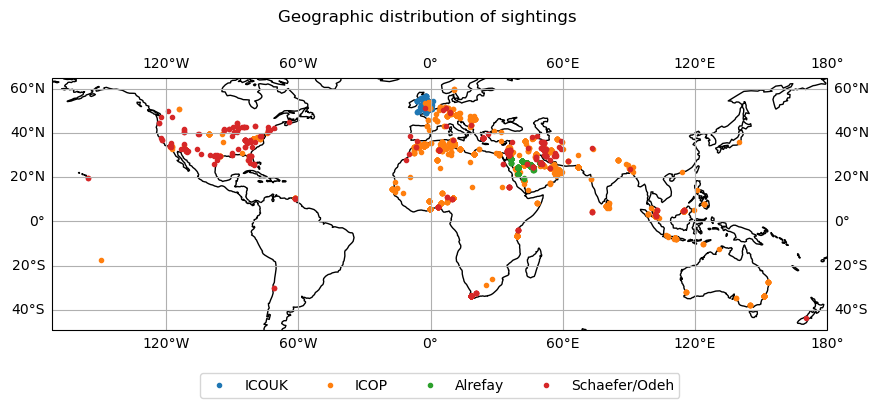

In [29]:
x = data["Longitude"]
y= data["Latitude"]
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111,projection=crs)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

for i, source in enumerate(sources):
    x = source["Longitude"]
    y = source["Latitude"]
    ax.plot(x,y,".",label=source_names[i])

fig.suptitle("Geographic distribution of sightings")
fig.legend(loc="lower center",ncol=4)
plt.show()

## Visibility

In [41]:
def plot_pie_distribution(column, title,labels=[]):

    fig = plt.figure(figsize=(10,2))

    pies = data[column].value_counts(sort=False)
    if len(labels) == 0:
        labels = data[column].unique()
    ax1 = fig.add_subplot(1,5,1)
    ax1.pie(pies, labels=labels, autopct='%1.0f%%')
    ax1.set_title("All sources")
    ax1.set_xlabel(f"N={data.shape[0]}")

    for i, source in enumerate(sources):
        pies = source[column].value_counts(sort=False)
        labels = source[column].unique()
        ax = fig.add_subplot(1,5,i+2)
        ax.pie(pies,labels=labels,autopct='%1.0f%%')
        ax.set_title(source_names[i])
        ax.set_xlabel(f"N={source.shape[0]}")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

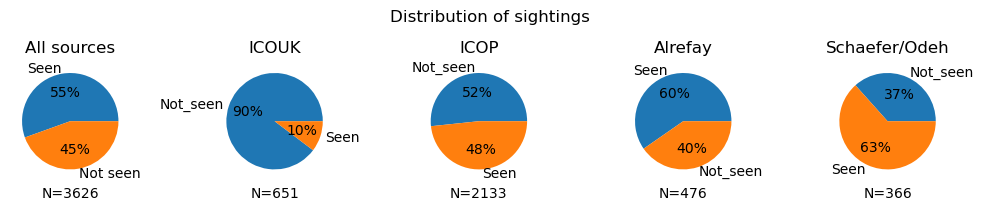

In [42]:
seen_labels=["Seen", "Not seen"]
plot_pie_distribution("Seen", "Distribution of sightings",seen_labels)

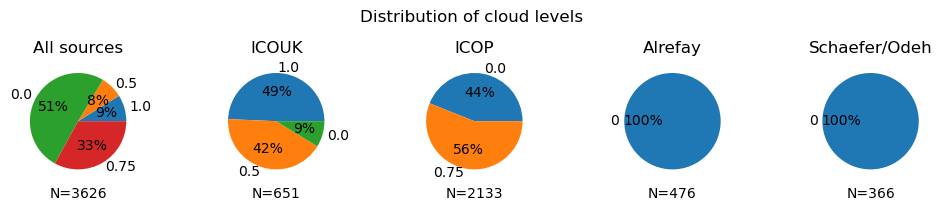

In [39]:
plot_pie_distribution("Cloud Level", "Distribution of cloud levels")

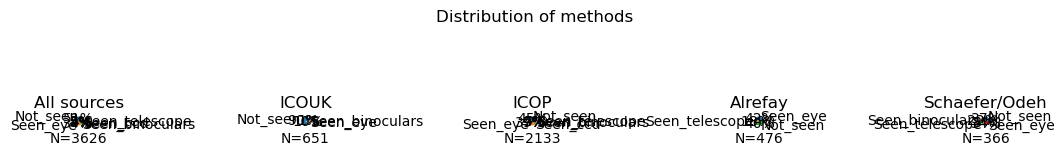

In [40]:
plot_pie_distribution("Method", "Distribution of methods")